**Importing Libraries**

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
from keras import regularizers

In [ ]:
import os

In [ ]:
mylist= os.listdir('maldata/')

In [ ]:
type(mylist)

list

In [ ]:
print(mylist[55])

05-02-02-02-02.wav


In [ ]:
print(mylist[55][:2])

05


In [ ]:
print(mylist[55][-6:-4])

02


 **Plotting the audio file's waveform and its spectrogram**

In [ ]:
data, sampling_rate = librosa.load('maldata/03-02-02-02-03.wav')

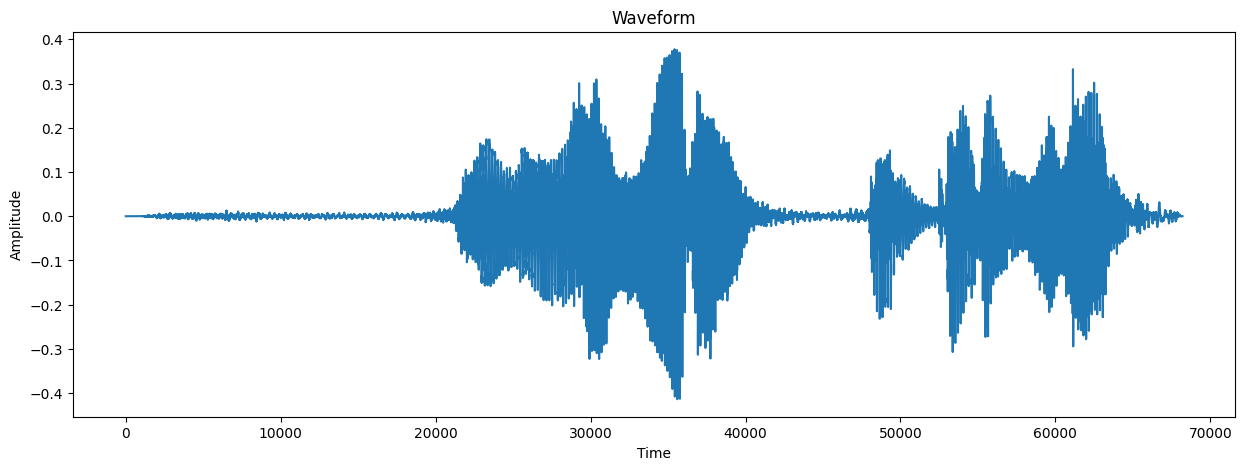

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Load audio file
data, sampling_rate = librosa.load('maldata/03-02-02-02-01.wav')

# Plot the waveform
plt.figure(figsize=(15, 5))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


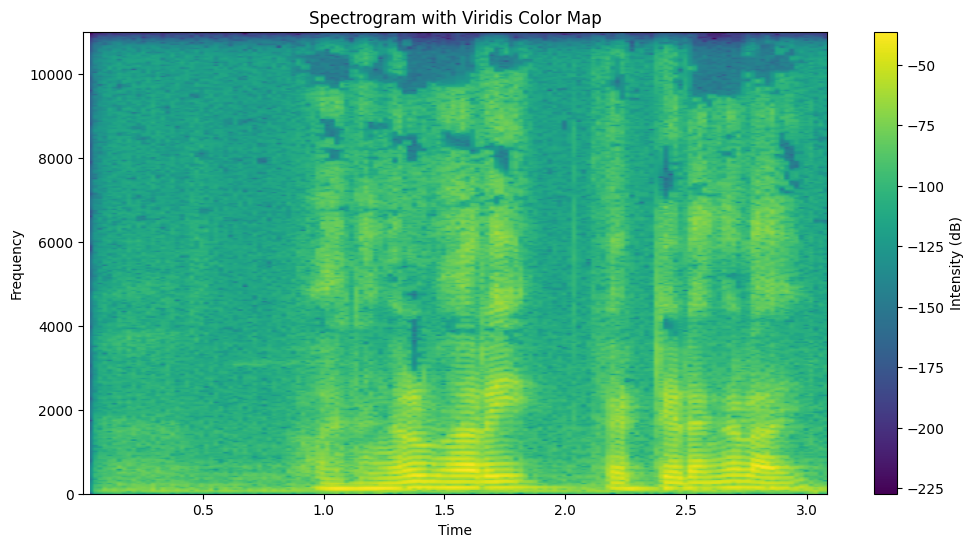

In [ ]:
nstep = int(sampling_rate * 0.01)
nwin = int(sampling_rate * 0.03)
nfft = nwin  # FFT window size

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.specgram(data, NFFT=nfft, Fs=sampling_rate, noverlap=nstep, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram with Viridis Color Map')
plt.colorbar(label='Intensity (dB)')
plt.show()

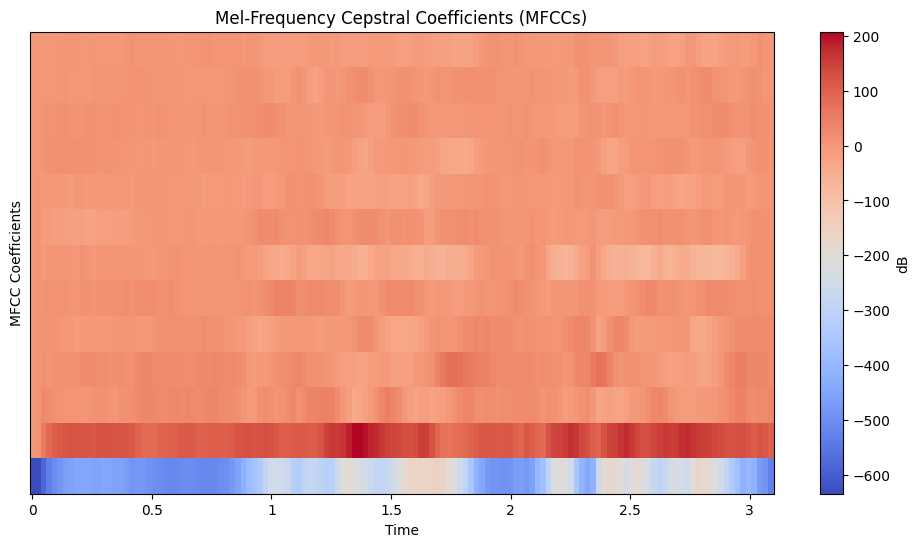

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time', cmap='coolwarm')
plt.colorbar(label='dB')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.title('Mel-Frequency Cepstral Coefficients (MFCCs)')
plt.show()


**Setting the labels**

In [ ]:
feeling_list=[]
for item in mylist:
    if item[:2]=='01' and int(item[-6:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[:2]=='01' and int(item[-6:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[:2]=='02' and int(item[-6:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[:2]=='02' and int(item[-6:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[:2]=='03' and int(item[-6:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[:2]=='03' and int(item[-6:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[:2]=='04' and int(item[-6:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[:2]=='04' and int(item[-6:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[:2] =='05' and int(item[-6:-4]) % 2==0:
        feeling_list.append('female_surprised')
    elif item[:2] =='05' and int(item[-6:-4]) % 2==1:
        feeling_list.append('male_surprised')

In [ ]:
labels = pd.DataFrame(feeling_list)

In [ ]:
labels[:10]

,0
0,female_sad
1,male_surprised
2,male_surprised
3,female_calm
4,male_sad
5,male_happy
6,male_sad
7,female_calm
8,male_surprised
9,female_surprised


**Getting the features of audio files using librosa**

In [ ]:
!pip install resampy

In [ ]:
!pip install --upgrade resampy

In [ ]:
import resampy

In [ ]:
!pip install --upgrade pip setuptools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.3 MB/s eta 0:00:00
  Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
import os

# Filter out non-audio files
audio_files = [f for f in os.listdir('maldata/') if f.endswith('.wav')]

# Process audio files
df = pd.DataFrame(columns=['feature'])
bookmark = 0
for index, y in enumerate(audio_files):
    X, sample_rate = librosa.load('maldata/' + y, res_type='kaiser_fast', duration=2.5, sr=22050*2, offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark += 1


In [ ]:
df[:5]

,feature
0,"[-22.756578, -19.878561, -19.72398, -18.789072..."
1,"[-16.923046, -13.785447, -15.4178295, -19.1737..."
2,"[-15.23024, -13.002466, -13.136098, -12.728921..."
3,"[-26.853924, -26.210878, -26.865862, -25.59275..."
4,"[-23.896685, -18.700628, -17.29779, -19.46027,..."


In [ ]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [ ]:
newdf = pd.concat([df3,labels], axis=1)

In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [ ]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-22.756578,-19.878561,-19.723980,-18.789072,-19.173439,-21.515224,-18.898863,-17.983385,-19.802031,-20.112507,...,-13.182386,-16.063099,-17.915867,-18.389606,-21.505289,-18.342525,-18.099838,-22.017576,-24.859529,female_sad
1,-16.923046,-13.785447,-15.417830,-19.173733,-17.400995,-16.912853,-18.008257,-15.609887,-14.203816,-16.245348,...,-24.551744,-22.701382,-22.832638,-21.352261,-20.868460,-21.539225,-23.312460,-27.022413,-29.094372,male_surprised
2,-15.230240,-13.002466,-13.136098,-12.728921,-11.720245,-12.223180,-12.496392,-13.260893,-13.305796,-14.033621,...,-24.951384,-24.515881,-22.343798,-21.674095,-19.197447,-22.168621,NaN,NaN,NaN,male_surprised
3,-26.853924,-26.210878,-26.865862,-25.592751,-25.637461,-24.531178,-24.907564,-25.117676,-24.765490,-24.363516,...,-22.168797,-19.409475,-19.626812,-21.183962,-18.924446,-17.743099,-15.901250,-17.017590,-19.375837,female_calm
4,-23.896685,-18.700628,-17.297791,-19.460270,-22.304352,-19.386930,-18.604298,-19.725334,-21.286184,-21.648478,...,-7.464486,-11.097146,-11.901875,-14.460774,-14.615077,-13.791240,-14.651201,-16.661064,-20.029640,male_sad


In [ ]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
33,-19.657118,-20.922909,-19.299265,-16.024092,-17.018150,-19.326923,-15.552454,-12.818573,-13.603411,-13.968064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_surprised
171,-13.897511,-13.169972,-13.972466,-14.156534,-12.997136,-11.764739,-12.787333,-12.523202,-10.432359,-11.071688,...,-15.038912,-14.565836,-15.622437,-15.872448,-15.789186,-14.396966,-10.444015,-9.745206,-10.332930,female_calm
187,-20.905666,-18.672377,-18.061398,-16.727507,-17.323866,-18.681923,-19.564598,-19.046337,-15.354992,-15.861065,...,-17.903343,-16.431633,-15.499546,-17.260344,-19.422396,-18.893959,-18.038252,-17.717606,-17.218449,female_happy
315,-21.556805,-15.199067,-15.595620,-16.267851,-12.467530,-12.216383,-14.629618,-14.251387,-14.583038,-15.229204,...,-13.231823,-15.169262,-14.775252,-18.097248,-17.019146,-17.130867,-17.724649,-17.524813,-19.296242,female_calm
311,-24.177065,-22.903826,-22.488007,-19.949018,-17.724838,-11.007646,-8.576044,-8.139843,-7.534059,-6.526776,...,-22.473398,-21.177629,-21.574644,-22.714882,NaN,NaN,NaN,NaN,NaN,male_happy
107,-20.974070,-21.272612,-22.820553,-22.439312,-20.937471,-21.011557,-21.951021,-20.924854,-18.200817,-18.505852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_angry
173,-24.493898,-23.371941,-22.816689,-24.556271,-24.936615,-24.313967,-24.268486,-24.879436,-26.313854,-25.759676,...,-16.146345,-16.560759,-17.771212,-16.755093,-16.367949,-17.931252,-18.961866,-16.808767,-14.584334,female_sad
95,-22.756578,-19.878561,-19.723980,-18.789072,-19.173439,-21.515224,-18.898863,-17.983385,-19.802031,-20.112507,...,-13.182386,-16.063099,-17.915867,-18.389606,-21.505289,-18.342525,-18.099838,-22.017576,-24.859529,female_sad
386,-19.633690,-17.790514,-17.178131,-14.000041,-14.259890,-14.130584,-14.847178,-16.588123,-15.249633,-14.037790,...,-9.499587,-12.693212,-13.155413,-15.507034,-17.440327,-13.847294,-14.069094,-16.399235,-21.131716,male_calm
4,-23.896685,-18.700628,-17.297791,-19.460270,-22.304352,-19.386930,-18.604298,-19.725334,-21.286184,-21.648478,...,-7.464486,-11.097146,-11.901875,-14.460774,-14.615077,-13.791240,-14.651201,-16.661064,-20.029640,male_sad


In [ ]:
rnewdf=rnewdf.fillna(0)

**Dividing the data into test and train**

In [ ]:
newdf1 = np.random.rand(len(rnewdf)) < 0.9
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [ ]:
train[50:60]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
323,-20.268078,-19.813538,-22.005852,-22.606655,-21.006052,-18.416180,-18.579174,-19.579847,-20.174265,-20.830681,...,-21.513411,-21.225798,-21.350199,-22.154076,-21.193769,-21.268517,-22.604452,-21.566639,-24.590208,female_happy
53,-20.999025,-18.002892,-19.915272,-21.944500,-19.069298,-19.281298,-23.709618,-22.500933,-20.041843,-21.685621,...,-18.338757,-17.976427,-17.562868,-18.243807,-18.938795,-17.216883,-17.840326,-19.536760,-17.553120,female_calm
21,-30.833523,-27.213602,-25.207207,-24.214905,-24.655140,-21.744759,-21.844105,-21.316296,-21.518066,-23.019735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_sad
372,-18.880068,-17.793377,-14.112188,-9.771242,-6.958839,-6.572626,-6.487730,-5.806304,-6.504293,-5.841767,...,-19.720650,-21.275240,-21.942207,-20.695539,-20.002310,-19.114136,-16.467876,-14.746009,-17.748898,male_calm
62,-7.723958,-7.979533,-10.449915,-10.108893,-9.209983,-8.560173,-8.609752,-6.850274,-5.636175,-5.626416,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_calm
356,-23.069523,-19.653446,-18.670256,-17.475719,-17.570486,-18.221785,-17.949907,-17.840773,-17.923378,-16.755505,...,-14.952348,-13.877842,-13.823485,-15.390660,-16.142323,-15.429160,-14.684073,-16.349846,-20.221615,male_happy
300,-18.181389,-18.206215,-19.956718,-21.166599,-21.644728,-20.972267,-20.693937,-20.502113,-21.382839,-22.323805,...,-29.680943,-26.471834,-26.590258,-30.802691,-31.191191,-29.231428,-29.042706,-28.964827,0.000000,male_angry
395,-21.095707,-17.153137,-13.981343,-15.321363,-19.280416,-20.788725,-22.425911,-22.360289,-20.403799,-21.313997,...,-17.558245,-19.156862,-18.673267,-20.481119,0.000000,0.000000,0.000000,0.000000,0.000000,male_calm
120,-7.315697,-10.339652,-14.794408,-13.739506,-13.462352,-13.264566,-12.863418,-12.852620,-11.050158,-10.243083,...,-19.059572,-20.453667,-21.262899,-19.510710,-18.623583,-18.527454,-20.587847,-20.738962,-24.105335,female_sad
250,-25.221905,-22.942467,-21.741619,-22.707308,-22.172770,-21.523149,-22.240543,-22.086578,-22.502398,-22.434427,...,-18.587013,-22.328550,-19.837706,-19.001575,-19.916145,-18.535326,-17.727959,-18.632002,-19.741726,female_angry


In [ ]:
trainfeatures = train.iloc[:, :-1]

In [ ]:
trainlabel = train.iloc[:, -1:]

In [ ]:
testfeatures = test.iloc[:, :-1]

In [ ]:
testlabel = test.iloc[:, -1:]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(362, 216)

**Changing dimension for CNN model**

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
# Define and compile the model
model = Sequential()
model.add(Conv1D(256, 5, padding='same', input_shape=(216, 1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 216, 256)          1536      
                                                                 
 activation_21 (Activation)  (None, 216, 256)          0         
                                                                 
 conv1d_19 (Conv1D)          (None, 216, 128)          163968    
                                                                 
 activation_22 (Activation)  (None, 216, 128)          0         
                                                                 
 dropout_17 (Dropout)        (None, 216, 128)          0         
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 27, 128)           0         
 g1D)                                                            
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=150, validation_data=(x_testcnn, y_test))

Epoch 1/150
23/23 [==============================] - 2s 25ms/step - loss: 2.3304 - accuracy: 0.1022 - val_loss: 2.2859 - val_accuracy: 0.0526
Epoch 2/150
23/23 [==============================] - 0s 7ms/step - loss: 2.2871 - accuracy: 0.1188 - val_loss: 2.2747 - val_accuracy: 0.0789
Epoch 3/150
23/23 [==============================] - 0s 8ms/step - loss: 2.2718 - accuracy: 0.1215 - val_loss: 2.2657 - val_accuracy: 0.1316
Epoch 4/150
23/23 [==============================] - 0s 7ms/step - loss: 2.2757 - accuracy: 0.1354 - val_loss: 2.2602 - val_accuracy: 0.1842
Epoch 5/150
23/23 [==============================] - 0s 7ms/step - loss: 2.2324 - accuracy: 0.2072 - val_loss: 2.2438 - val_accuracy: 0.1842
Epoch 6/150
23/23 [==============================] - 0s 7ms/step - loss: 2.2379 - accuracy: 0.1851 - val_loss: 2.2366 - val_accuracy: 0.2105
Epoch 7/150
23/23 [==============================] - 0s 7ms/step - loss: 2.2152 - accuracy: 0.2155 - val_loss: 2.2254 - val_accuracy: 0.2368
Epoch 8/150


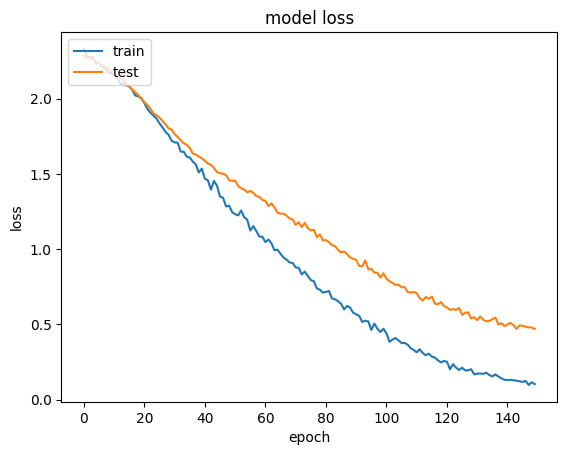

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

**Loading the model**

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 94.74%


**Predicting emotions on the test data**

In [ ]:
preds = loaded_model.predict(x_testcnn,
                         batch_size=16,
                         verbose=1)

3/3 [==============================] - 0s 4ms/step


In [ ]:
preds

array([[3.65091421e-12, 3.58454315e-08, 3.55751808e-07, 3.19562488e-10,
        5.67381489e-11, 9.98565614e-01, 5.44781642e-06, 1.37378403e-03,
        2.28559620e-05, 3.19673672e-05],
       [7.79668959e-14, 2.91804303e-10, 1.60887807e-12, 1.21570031e-13,
        1.09673580e-14, 1.23089412e-04, 7.02881429e-04, 2.31351260e-06,
        9.99110758e-01, 6.09226954e-05],
       [1.51511398e-04, 1.03985891e-02, 3.48564936e-04, 1.85649187e-05,
        1.82843578e-04, 8.79590225e-04, 2.24187202e-03, 9.84340310e-01,
        1.80771473e-04, 1.25745800e-03],
       [2.69958420e-08, 3.43712047e-04, 1.41223973e-05, 2.82099705e-07,
        1.05455040e-08, 2.71005537e-02, 4.73860055e-02, 4.82424609e-02,
        8.63268852e-01, 1.36440145e-02],
       [8.53327583e-06, 2.10245652e-03, 4.01466340e-01, 3.06736882e-04,
        3.27841286e-03, 5.82415044e-01, 8.54000170e-03, 7.21837801e-04,
        1.53213914e-05, 1.14535447e-03],
       [9.33023542e-03, 3.65785649e-03, 3.13678547e-03, 2.72704549e-02,
   

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([5, 8, 7, 8, 5, 8, 3, 2, 0, 1, 9, 8, 1, 8, 8, 1, 9, 5, 8, 5, 4, 2,
       2, 6, 9, 1, 0, 0, 9, 6, 8, 6, 0, 7, 5, 4, 3, 0])

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_angry
1,male_sad
2,male_happy
3,male_sad
4,male_angry
5,male_sad
6,female_sad
7,female_happy
8,female_angry
9,female_calm


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_angry
1,male_sad
2,male_happy
3,male_sad
4,male_happy
5,male_sad
6,female_sad
7,female_happy
8,female_angry
9,female_calm


In [ ]:
finaldf = actualdf.join(preddf)

**Actual v/s Predicted emotions**

In [ ]:
finaldf[30:40]

,actualvalues,predictedvalues
30,male_sad,male_sad
31,male_calm,male_calm
32,female_angry,female_angry
33,male_happy,male_happy
34,male_angry,male_angry
35,female_surprised,female_surprised
36,female_sad,female_sad
37,female_angry,female_angry


In [ ]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,5
female_calm,4
female_happy,3
female_sad,2
female_surprised,2
male_angry,3
male_calm,3
male_happy,4
male_sad,8


In [ ]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,5
female_calm,4
female_happy,3
female_sad,2
female_surprised,2
male_angry,5
male_calm,3
male_happy,2
male_sad,8


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.models import load_model

In [ ]:
# Print the accuracy of the model
accuracy = accuracy_score(actual, preds1)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the confusion matrix
cm = confusion_matrix(actual, preds1)
print("Confusion Matrix:")
print(cm)

# Generate a classification report
report = classification_report(actual, preds1, target_names=lb.classes_)
print("Classification Report:")
print(report)


Accuracy: 94.74%
Confusion Matrix:
[[5 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 2 0 2 0 0]
 [0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 4]]
Classification Report:
                  precision    recall  f1-score   support

    female_angry       1.00      1.00      1.00         5
     female_calm       1.00      1.00      1.00         4
    female_happy       1.00      1.00      1.00         3
      female_sad       1.00      1.00      1.00         2
female_surprised       1.00      1.00      1.00         2
      male_angry       0.60      1.00      0.75         3
       male_calm       1.00      1.00      1.00         3
      male_happy       1.00      0.50      0.67         4
        male_sad       1.00      1.00      1.00         8
  male_surprised       1.00      1.00      1.00         4

        accuracy                           0.95        38
       macro 

**model comparison with LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Assuming X_train and X_test are reshaped for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(128, return_sequences=False))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(10, activation='softmax'))  # Adjust the number of units to match the number of classes

# Compile the model
model_lstm.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_lstm.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 216, 128)          66560     
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 199434 (779.04 KB)
Trainable params: 199434 (779.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
lstm_history = model_lstm.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/150
23/23 [==============================] - 6s 57ms/step - loss: 2.3269 - accuracy: 0.1354 - val_loss: 2.3252 - val_accuracy: 0.0789
Epoch 2/150
23/23 [==============================] - 0s 20ms/step - loss: 2.3113 - accuracy: 0.1381 - val_loss: 2.3166 - val_accuracy: 0.0789
Epoch 3/150
23/23 [==============================] - 0s 20ms/step - loss: 2.3168 - accuracy: 0.1464 - val_loss: 2.3094 - val_accuracy: 0.0789
Epoch 4/150
23/23 [==============================] - 0s 20ms/step - loss: 2.3300 - accuracy: 0.1436 - val_loss: 2.3039 - val_accuracy: 0.0789
Epoch 5/150
23/23 [==============================] - 0s 21ms/step - loss: 2.3148 - accuracy: 0.1409 - val_loss: 2.2992 - val_accuracy: 0.0789
Epoch 6/150
23/23 [==============================] - 0s 21ms/step - loss: 2.3128 - accuracy: 0.1602 - val_loss: 2.2938 - val_accuracy: 0.0789
Epoch 7/150
23/23 [==============================] - 1s 27ms/step - loss: 2.3129 - accuracy: 0.1243 - val_loss: 2.2893 - val_accuracy: 0.0526
Epoch 

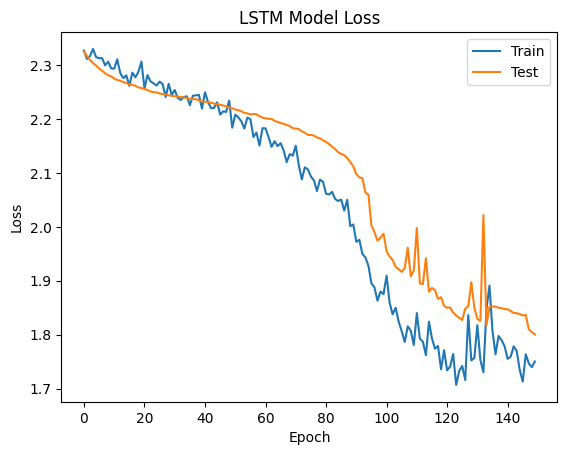

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(lstm_history.history['loss'], label='Training loss')
plt.plot(lstm_history.history['val_loss'], label='Validation loss')
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
# Save the model
model_lstm.save('LSTM_Emotion_Voice_Detection_Model.h5')
print('Saved LSTM model to disk')

# Evaluate the model
score_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)
print("LSTM model accuracy: %.2f%%" % (score_lstm[1] * 100))

# Make predictions
lstm_preds = model_lstm.predict(X_test, batch_size=16)
lstm_preds1 = lstm_preds.argmax(axis=1)
lstm_predictions = lb.inverse_transform(lstm_preds1)
lstm_preddf = pd.DataFrame({'predictedvalues': lstm_predictions})

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved LSTM model to disk
LSTM model accuracy: 44.74%
3/3 [==============================] - 1s 11ms/step


In [ ]:
# Compare actual and predicted
lstm_actual = y_test.argmax(axis=1)
lstm_actual_values = lb.inverse_transform(lstm_actual)
lstm_actualdf = pd.DataFrame({'actualvalues': lstm_actual_values})
lstm_finaldf = lstm_actualdf.join(lstm_preddf)
print(lstm_finaldf[30:40])

        actualvalues   predictedvalues
30          male_sad        male_angry
31         male_calm         male_calm
32      female_angry       female_calm
33        male_happy          male_sad
34        male_angry        male_angry
35  female_surprised  female_surprised
36        female_sad       female_calm
37      female_angry  female_surprised


In [ ]:
# Count predictions by class
print(lstm_finaldf.groupby('actualvalues').count())
print(lstm_finaldf.groupby('predictedvalues').count())

                  predictedvalues
actualvalues                     
female_angry                    5
female_calm                     4
female_happy                    3
female_sad                      2
female_surprised                2
male_angry                      3
male_calm                       3
male_happy                      4
male_sad                        8
male_surprised                  4
                  actualvalues
predictedvalues               
female_angry                 1
female_calm                  5
female_happy                 2
female_sad                   3
female_surprised             3
male_angry                  10
male_calm                    7
male_happy                   1
male_sad                     4
male_surprised               2


In [ ]:
# Convert probabilities to label indices
lstm_preds1 = np.argmax(lstm_preds, axis=1)

# Ensure y_test is label-encoded for comparison
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, lstm_preds1)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate the confusion matrix
cm = confusion_matrix(y_test, lstm_preds1)
print("Confusion Matrix:")
print(cm)

# Generate and print classification report
# Assuming lb.classes_ holds the names of the classes
report = classification_report(y_test, lstm_preds1, target_names=lb.classes_)
print("Classification Report:")
print(report)

Accuracy: 44.74%
Confusion Matrix:
[[1 2 0 1 1 0 0 0 0 0]
 [0 2 0 1 0 1 0 0 0 0]
 [0 0 2 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 1 2 0 0 0]
 [0 0 0 0 0 2 1 0 1 0]
 [0 0 0 0 0 3 2 1 2 0]
 [0 0 0 0 0 0 1 0 1 2]]
Classification Report:
                  precision    recall  f1-score   support

    female_angry       1.00      0.20      0.33         5
     female_calm       0.40      0.50      0.44         4
    female_happy       1.00      0.67      0.80         3
      female_sad       0.33      0.50      0.40         2
female_surprised       0.67      1.00      0.80         2
      male_angry       0.30      1.00      0.46         3
       male_calm       0.29      0.67      0.40         3
      male_happy       0.00      0.00      0.00         4
        male_sad       0.50      0.25      0.33         8
  male_surprised       1.00      0.50      0.67         4

        accuracy                           0.45        38
       macro 

**SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy of filling missing values with the 'mean' of the column
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform it
X_train_scaled = imputer.fit_transform(X_train_scaled)

# Transform the test data with the same imputer
X_test_scaled = imputer.transform(X_test_scaled)

# Now fit the SVM model
svm_model = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
svm_model.fit(X_train_scaled, y_train)


SVC(gamma='auto')

In [ ]:
y_pred = svm_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.95
                  precision    recall  f1-score   support

    female_angry       0.78      1.00      0.88         7
     female_calm       1.00      1.00      1.00         6
    female_happy       1.00      1.00      1.00         5
      female_sad       1.00      1.00      1.00        10
female_surprised       1.00      0.78      0.88         9
      male_angry       1.00      1.00      1.00        10
       male_calm       0.92      1.00      0.96        12
      male_happy       0.86      1.00      0.92         6
        male_sad       1.00      1.00      1.00         6
  male_surprised       1.00      0.78      0.88         9

        accuracy                           0.95        80
       macro avg       0.96      0.96      0.95        80
    weighted avg       0.96      0.95      0.95        80



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid.best_params_)
print("Best accuracy achieved: ", grid.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01